**Libraries**

In [ ]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Libraries imported, if imported correctly the below will print
print("Libraries imported.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Libraries imported.


Upload data set

In [1]:
# Data set upload
filepath = "/content/Stock_forecast.csv"

In [3]:
# First look at the dataset
df = pd.read_csv(filepath, encoding = "cp1251") # Encoding as would not open
df.head(1)

,InvoiceNo,Stock Code,Description,Quantity,InvoiceDate,Price,Customer,Region
0,2013001184,TRIHAL_DYE007,Trihal 2000кВА. 6/0.4кВ.IP00. Dyn11. 6PTC,2.0,01.01.18,747.0,"""ПромТехноРесурсKZ"" ТОО",Юг


In [4]:
# Initial look at the data types
# df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Data Prep/ Investigation




In [5]:
# Turns columns to datetime data type
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Seperate date column
df["Date"] = df["InvoiceDate"].dt.date
# Time column
df["InvoiceTime"] = df["InvoiceDate"].dt.time
# df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-5-ff7de4e939e4>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [7]:
# convert column from object to string
df["Description"] = df["Description"].astype(str)

# Storing rows with words found thorught the project that are not product sales
remove_words = ["Discount", "SAMPLES"]

# Boolean indexing to drop rows containing specific words
df = df[~df["Description"].str.contains("|".join(remove_words))]

df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo      0
Stock Code     0
Description    0
Quantity       1
InvoiceDate    1
Price          1
Customer       1
Region         1
Date           1
InvoiceTime    1
dtype: int64

In [8]:
# Have a total order column by multiplying the quantity by unit price
df["TotalPrice"]= df["Quantity"]*df["Price"]

df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,Stock Code,Description,Quantity,InvoiceDate,Price,Customer,Region,Date,InvoiceTime,TotalPrice
0,2013001184,TRIHAL_DYE007,Trihal 2000кВА. 6/0.4кВ.IP00. Dyn11. 6PTC,2.0,2018-01-01,747.0,"""ПромТехноРесурсKZ"" ТОО",Юг,2018-01-01,00:00:00,1494.0
1,2012000414,SERMOBILIZ,Мобилизация специалистов/Стоимость путешествия,1.0,2018-02-01,733.0,Schneider Electric ZAO,Прочие,2018-02-01,00:00:00,733.0
2,2012000414,SERVTRAV,Время на транспорт (час),15.0,2018-02-01,335.0,Schneider Electric ZAO,Прочие,2018-02-01,00:00:00,5025.0
3,2012000414,SERWD,Рабочий день (с Пн. до Пт. - с 8 до 17 часов),5.0,2018-02-01,2232.0,Schneider Electric ZAO,Прочие,2018-02-01,00:00:00,11160.0
4,2011002855,SERVGETDOC_KTR002,Экс.закл.Разр.ЧС.Серт.РК,1.0,2018-02-01,9850.0,Schneider Electric ZAO,Прочие,2018-02-01,00:00:00,9850.0


In [9]:
# Missing values
# df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Checking the df
# df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Assuming that minus values are refunds
# print(df[df["Quantity"] < 0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Need to reference/ If quantity is negative, it is a returned or cancelled item
df["Transaction Type"] = np.where(df["Quantity"] < 0, "Cancelled", "Sale")

# Print the resulting dataframe
# print(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
#@title Duplicates
# If row duplicated store here
Duplicates = df[df.duplicated(keep=False)]

# If statement which shows
if len(Duplicates) > 0:
  # Prints the length or count of duplicate rows
    print("Total count of duplicate rows:", len(Duplicates))
# If all duplicates missing or now deleted will show no duplicate found
else:
    print("No duplicate rows found.")


# Droppin doubles
df = df.drop_duplicates()

# DOne again to check if deleted now
Duplicates2 = df[df.duplicated(keep=False)]

# If statement which shows
if len(Duplicates2) > 0:
  # Prints the length or count of duplicate rows
    print("Total count of duplicate rows:", len(Duplicates2))
# If all duplicates missing or now deleted will show no duplicate found
else:
    print("No duplicate rows found, they have now been deleted.")


No duplicate rows found.
No duplicate rows found, they have now been deleted.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
#@title Start/End Date
# Looking for start and end date in df
StartDate = (df["InvoiceDate"].min())
EndDate = (df["InvoiceDate"].max())
print("Start date of data set: ", StartDate)
print("End date of data set: ", EndDate)

Start date of data set:  2018-01-01 00:00:00
End date of data set:  2018-12-11 00:00:00


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,Quantity,InvoiceDate,Price,TotalPrice
count,3.233900e+04,32338.000000,32338,3.233800e+04,3.233800e+04
mean,2.012807e+09,152.718907,2018-06-23 10:49:25.229760768,1.049675e+03,2.364540e+05
min,2.011000e+09,1.000000,2018-01-01 00:00:00,0.000000e+00,0.000000e+00
25%,2.012700e+09,5.000000,2018-03-21 00:00:00,4.700000e+01,3.600000e+02
50%,2.012701e+09,20.000000,2018-06-20 00:00:00,1.080000e+02,2.116500e+03
75%,2.013001e+09,96.000000,2018-09-20 00:00:00,2.810000e+02,1.596000e+04
max,2.013720e+09,32064.000000,2018-12-11 00:00:00,2.547600e+06,4.596374e+08
std,6.467450e+05,651.377528,NaN,2.416220e+04,4.807398e+06


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


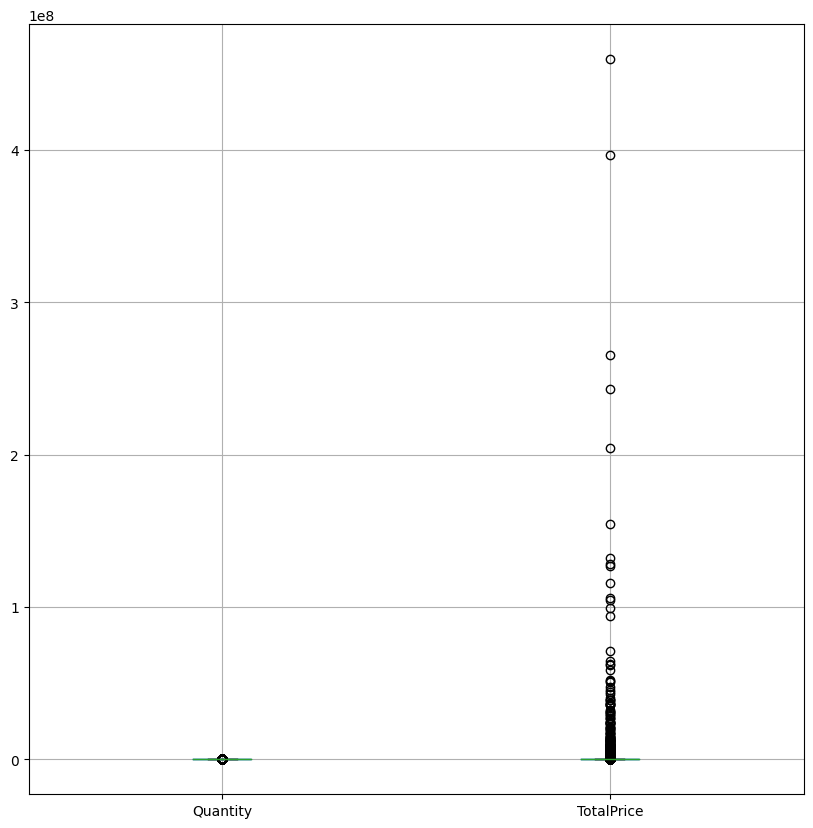

In [16]:
# Locating outliers throuhg a box plot, on colu,n qunatity by price
df.loc[:, ["Quantity", "TotalPrice"]].boxplot(figsize = (10,10));

In [17]:
# Function with some pre argumetns inside
def remove_outliers(data, lower_percentile = 0.25, upper_percentile = 0.75):
  # Defining Q's
    q1 = data.quantile(lower_percentile)
    q3 = data.quantile(upper_percentile)
    # Finding the inter quartile range
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Checks if data is in side the quartile range and stored
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    return filtered_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# Outliers removed for quantity
df.Quantity = remove_outliers(df.Quantity)
# Outliers removed for price
df.Revenue = remove_outliers(df.TotalPrice)
df.dropna(inplace=True)
df.loc[:, ["Quantity", "TotalPrice"]].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-18-6ccaabdf0e46>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Revenue = remove_outliers(df.TotalPrice)


,Quantity,TotalPrice
count,27990.000000,2.799000e+04
mean,34.733012,1.684597e+04
std,48.853466,2.611206e+05
min,1.000000,0.000000e+00
25%,4.000000,2.800000e+02
50%,10.000000,1.260000e+03
75%,48.000000,6.100000e+03
max,231.000000,3.209298e+07


# Data Analysis (Product)

In [19]:
#@title Country Sales
import plotly.express as px

# New Country df with columns for the graph
CountryDF = df[["Region", "Quantity", "TotalPrice"]]

# Grouping all countries to see the biggest buyers with.sum()
CountryDFgrouped = CountryDF.groupby("Region").sum()

# Top 20 countries based on Quantity
CountryDFquantity = CountryDFgrouped.sort_values("Quantity", ascending = False).head(20)

# Bar chart for Quantity on x and country on y axis using Plotly made horizontal
fig_quantity = px.bar(CountryDFquantity, x = "Quantity", y = CountryDFquantity.index,
                      orientation = "h", labels={"Quantity": "Quantity Sold", "y": "Region"}, title = "Top 20 Countries by Quantity Sold")

# Adding in colour code for graph
fig_quantity.update_traces(marker = dict(color = px.colors.sequential.Oranges))

fig_quantity.show()

# top 20 countries based on Total Price
CountryDFprice = CountryDFgrouped.sort_values("TotalPrice", ascending = False).head(20)

# Bar chart for Total Price on x and country on y axis using Plotly made horizontal
fig_price = px.bar(CountryDFprice, x = "TotalPrice", y = CountryDFprice.index, orientation="h",
                   labels={"TotalPrice": "Total Price", "y": "Region"}, title = "Top 20 Countries by Total Price")

# Adding in colour code for graph
fig_price.update_traces(marker = dict(color = px.colors.sequential.Oranges))

fig_price.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Top 10 best-selling products:
                                                    TotalPrice  Quantity  \
Description                                                                
РАМКА. 3 МЕСТА. БЕЖЕВЫЙ                             32157270.0     855.0   
Вакуумный выключатель VOX35кВ. 25кА. 1250А          20857075.0      25.0   
Рабочий день (с Пн. до Пт. - с 8 до 17 часов)       16660691.0     342.0   
RM6 RE-BIBI 24кВ. 16кА. 630А. VIP400. VPIS          15174140.0      60.0   
Evolis выкатной 12 кВ 630А 25кА 2.3 блок доп конта  14165270.0     142.0   
Контроллер MiCOM P123B00Z152                        10694460.0     278.0   
4 СОЕДИНИТЕЛЯ ДЛЯ КАБЕЛЕЙ                            8838171.0     664.0   
ИЗМЕРИТЕЛЬ МОЩНОСТИ. МНОГОФУНКЦ.. PM810              6114940.0     346.0   
Контроллер MiCOM P123B00W352                         5128135.0     111.0   
Вакуумный выключатель Эволис 12кВ.630А.25кА. 185mm   4964060.0      77.0   

                                                         

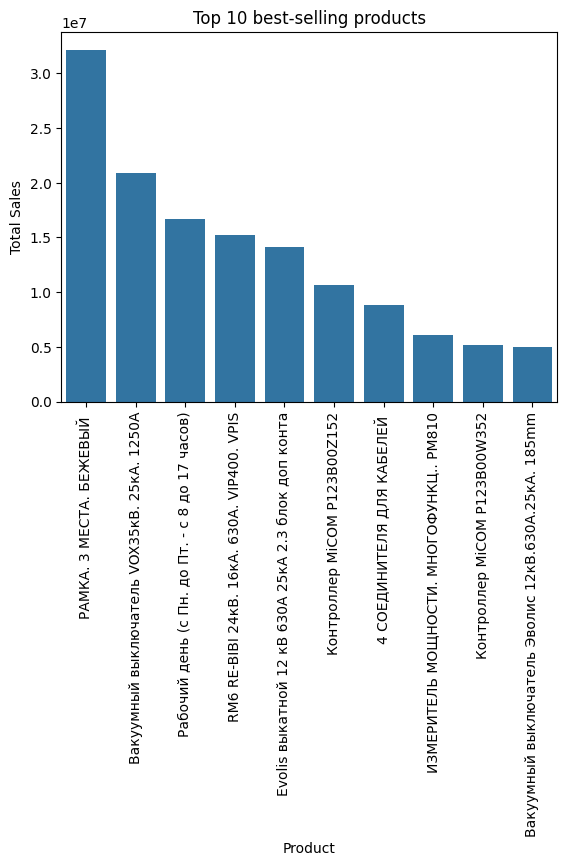

Worst 10 products:
                                                  TotalPrice  Quantity  Price
Description                                                                  
Реле тепловое 30 - 38А                                   0.0      22.0    0.0
крепежный винт 4х16 мм                                   0.0     100.0    0.0
РАСПР.КОЛОД. POLYBLOC. 250 A. 3 ПОЛЮСА                   0.0       5.0    0.0
Спец ключ для гнезда безопасности диаметром 4 мм         0.0       5.0    0.0
ПЛАТА ДЛЯ МОНТАЖА НА ДВЕ                                 0.0       8.0    0.0
...                                                      ...       ...    ...
АВТ. ВЫКЛ.iC60N 3П 20A B                                15.0       1.0   15.0
БОКОВЫЕ ПАНЕЛИ ЦОКОЛЯ 400 Х 100                         15.0       2.0    7.5
АВТ. ВЫКЛ. C60N 3П 20A B                                16.0       1.0   16.0
ПЕР.ПАН.ГОР.ВЫДВИЖНЫХ АПП-ТОВ NS630                     16.0       1.0   16.0
КОМПЛЕКТУЮЩИЕ ДЛЯ РЕВЕРСИ                    

<function matplotlib.pyplot.show(close=None, block=None)>

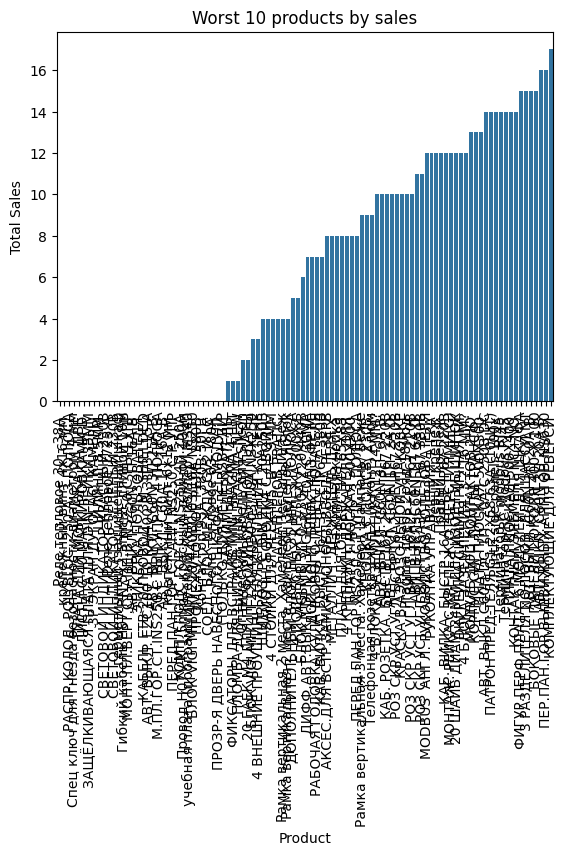

In [22]:
#@title Best/Worst selling products
# Group the data by product and sum the total sales, quantity, and calculate the unit price for each product
ProductSummary = df.groupby("Description").agg({"TotalPrice": "sum", "Quantity": "sum"})
ProductSummary["Price"] = ProductSummary["TotalPrice"] / ProductSummary["Quantity"]

# Sort the products by total sales in descending order and select the top 10
BestProduct = ProductSummary.sort_values(by="TotalPrice", ascending=False).head(10)

# Print the top 10 products
print("Top 10 best-selling products:")
print(BestProduct)

# Plot the top 10 products and their sales
sns.barplot(x = BestProduct.index, y = "TotalPrice", data = BestProduct)
plt.title("Top 10 best-selling products")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

# Sort the products by total sales in ascending order and select the worst 10
WorstProduct = ProductSummary.sort_values(by="TotalPrice").head(100)

# Print the worst 10 products
print("Worst 10 products:")
# Prints in list format
print(WorstProduct)

# Plot the worst 10 products and their sales
sns.barplot(x = WorstProduct.index, y  ="TotalPrice", data = WorstProduct)
# Addint titles to the graoh
plt.title("Worst 10 products by sales")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show

In [84]:
#@title Best/ Worst selling products
import plotly.graph_objects as go
import plotly.express as px

# Sort the products by total sales in descending order and select the top 10
BestProduct = ProductSummary.sort_values(by = "TotalPrice", ascending = False).head(10)

# Plot the top 10 products and their sales
fig = px.bar(BestProduct, x=BestProduct.index, y = "TotalPrice", hover_data = ["Quantity", "Price"])
fig.update_layout(
    title="Top 10 best-selling products",
    xaxis_title="Product",
    yaxis_title="Total Sales")

# Adding in colour code for graoh
fig.update_traces(marker=dict(color=px.colors.sequential.Greens))

fig.show()

# Sort the products by total sales in ascending order and select the worst 10
WorstProduct = ProductSummary.sort_values(by = "TotalPrice").head(10)

# Plot the worst 10 products and their sales
fig = px.bar(WorstProduct, x = WorstProduct.index, y="TotalPrice", hover_data=["Quantity", "Price"])
fig.update_layout(title = "Worst 25 products by sales", xaxis_title = "Product", yaxis_title = "Total Sales")

# Adding in colour code for graph

fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [23]:
# Create own month and year column with pandas to see if month has any correlation with the data set
df["Year"] = pd.to_datetime(df["InvoiceDate"]).dt.year
df["Quarter"] = df.InvoiceDate.dt.quarter
df["Month"] = pd.to_datetime(df["InvoiceDate"]).dt.month
df["Week"] = pd.to_datetime(df["InvoiceDate"]).dt.isocalendar().week

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [24]:
# Convert InvoiceDate to datetime type
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Create a new column IsWeekend based on the day of the week
df["IsWeekend"] = (df["InvoiceDate"].dt.dayofweek >= 5).astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [25]:
# To check it worked, uses bool to check if 1 which means yes it is weekend
weekend = df[df["IsWeekend"] == True]
# Check it worked
print(weekend)

        InvoiceNo      Stock Code                             Description  \
295    2012700557       WDE000191  TV АНТЕННА КОННЕКТОР 0.7DB.МЕХ-М.БЕЛЫЙ   
297    2012700557       WDE000102                  РАМКА. 2 МЕСТА. БЕЛЫЙ    
408    2013700265        MIP22312  ЩИТ MINI PRAGMA 3РЯД/36МОД.ВСТР.БЕЛ.ДВ   
409    2013700265   MGU5.486.18ZD                    Аудио розетка Белый    
410    2013700265   MGU5.486.25ZD                  Аудио розетка Бежевый    
...           ...             ...                                     ...   
32333  2013000832  NSYSF2016402DP              ШКАФ SP6000 С МОНТ. ПЛАТО    
32334  2013000832      NSYSPS4100              2 ПАНЕЛИ К ЦОКОЛЮ 100х400    
32335  2013000832  AB1FUSE435U5XB               КЛЕММА ДЛЯ ПРЕДОХР. 5X20    
32336  2013000947       SR3B261FU  ZELIO LOGIC РЕЛЕ МОДУЛЬН26ВХ/ВЫХ ~240В   
32337  2013000947        LV431110        3П3T TM250D NSX250B, АВТОМ.ВЫКЛ.   

       Quantity InvoiceDate   Price        Customer  Region        Date  \


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [26]:
#@title Duplicates
# If row duplicated store here
Duplicates = df[df.duplicated(keep=False)]

# There were over 10,000 duplicates, if statement
if len(Duplicates) > 0:
  # Prints the length or count of duplicate rows
  print("Current count of duplicate rows:", len(Duplicates))
  # Droppin doubles
  df = df.drop_duplicates()
# If all duplicates missing or now deleted will show no duplicate found
else:
  print("No duplicate rows found to begin with.")

# If there are still duplicated rows
Duplicates2 = df[df.duplicated(keep=False)]

# There were over 10,000 duplicates, if statement
if len(Duplicates2) > 0:
  # Prints the length or count of duplicate rows
  print("Total count of duplicate rows after current count:", len(Duplicates2))
# If all duplicates missing or now deleted will show no duplicate found
else:
  print("No duplicate rows found, all have been deleted successfully.")

No duplicate rows found to begin with.
No duplicate rows found, all have been deleted successfully.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# Encoding Data


Encoding to numeric/binary value

In [27]:
df.info()
PreDf = df.copy()
PreDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27990 entries, 0 to 32337
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   InvoiceNo         27990 non-null  int64         
 1   Stock Code        27990 non-null  object        
 2   Description       27990 non-null  object        
 3   Quantity          27990 non-null  float64       
 4   InvoiceDate       27990 non-null  datetime64[ns]
 5   Price             27990 non-null  float64       
 6   Customer          27990 non-null  object        
 7   Region            27990 non-null  object        
 8   Date              27990 non-null  object        
 9   InvoiceTime       27990 non-null  object        
 10  TotalPrice        27990 non-null  float64       
 11  Transaction Type  27990 non-null  object        
 12  Year              27990 non-null  int32         
 13  Quarter           27990 non-null  int32         
 14  Month             27990 non

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [41]:
from sklearn.preprocessing import LabelEncoder

# Enabelling the LabelEncoder
le = LabelEncoder()

# apply label encoding to the columns
df["Stock Code"] = le.fit_transform(df["Stock Code"])
df["Description"] = le.fit_transform(df["Description"])
df["Region"] = le.fit_transform(df["Region"])
df["Customer"] = le.fit_transform(df["Customer"])
df["Transaction Type"] = le.fit_transform(df["Transaction Type"])

# Sorting data types
df["Year"] = df["InvoiceDate"].dt.year
df["Date"] = df["InvoiceDate"].dt.day
# df["Week"] = df["InvoiceDate"].dt.week
df["InvoiceTime"] = df["InvoiceDate"].dt.hour * 60 + df["InvoiceDate"].dt.minute

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [42]:
# Make Range between Max and min
AllDates = pd.date_range(start = StartDate, end = EndDate, freq = "D").date

# Dates between max and min
IncludedDates = df["InvoiceDate"].dt.date.unique()

# Dates not included in df
MissingDates = np.setdiff1d(AllDates, IncludedDates)

# All Missing Dates
print("Dates where there were no invoices sold:\n\n", MissingDates)

Dates where there were no invoices sold:

 [datetime.date(2018, 1, 2) datetime.date(2018, 1, 3)
 datetime.date(2018, 1, 4) datetime.date(2018, 1, 5)
 datetime.date(2018, 1, 6) datetime.date(2018, 1, 7)
 datetime.date(2018, 1, 8) datetime.date(2018, 1, 9)
 datetime.date(2018, 1, 10) datetime.date(2018, 1, 11)
 datetime.date(2018, 1, 12) datetime.date(2018, 1, 13)
 datetime.date(2018, 1, 14) datetime.date(2018, 1, 18)
 datetime.date(2018, 1, 19) datetime.date(2018, 1, 22)
 datetime.date(2018, 1, 23) datetime.date(2018, 1, 26)
 datetime.date(2018, 1, 27) datetime.date(2018, 1, 31)
 datetime.date(2018, 2, 3) datetime.date(2018, 2, 4)
 datetime.date(2018, 2, 6) datetime.date(2018, 2, 7)
 datetime.date(2018, 2, 8) datetime.date(2018, 2, 9)
 datetime.date(2018, 2, 10) datetime.date(2018, 2, 11)
 datetime.date(2018, 2, 12) datetime.date(2018, 2, 13)
 datetime.date(2018, 2, 14) datetime.date(2018, 2, 18)
 datetime.date(2018, 2, 19) datetime.date(2018, 2, 22)
 datetime.date(2018, 2, 23) datetime

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27990 entries, 0 to 32337
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   InvoiceNo         27990 non-null  int64         
 1   Stock Code        27990 non-null  int64         
 2   Description       27990 non-null  int64         
 3   Quantity          27990 non-null  float64       
 4   InvoiceDate       27990 non-null  datetime64[ns]
 5   Price             27990 non-null  float64       
 6   Customer          27990 non-null  int64         
 7   Region            27990 non-null  int64         
 8   Date              27990 non-null  int32         
 9   InvoiceTime       27990 non-null  int32         
 10  TotalPrice        27990 non-null  float64       
 11  Transaction Type  27990 non-null  int64         
 12  Year              27990 non-null  int32         
 13  Quarter           27990 non-null  int32         
 14  Month             27990 non

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# Data Anlaysis (Sales)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



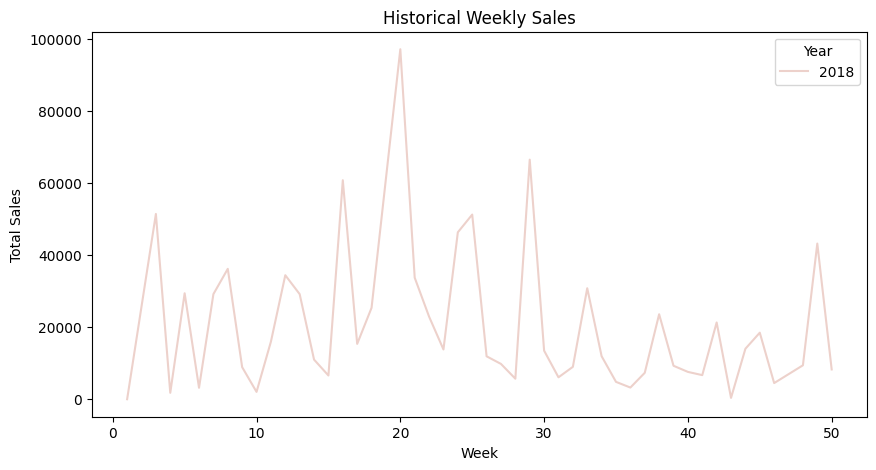

In [36]:
# Compute the total monthly sales
WeeklySales = df.groupby(["Year", "Week"])["Quantity"].sum().reset_index()

# Plot the historical monthly sales with year hue
plt.figure(figsize=(10, 5))
sns.lineplot(x="Week", y="Quantity", hue="Year", data=WeeklySales)
plt.xlabel("Week")
plt.ylabel("Total Sales")
plt.title("Historical Weekly Sales")
plt.legend(title="Year")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



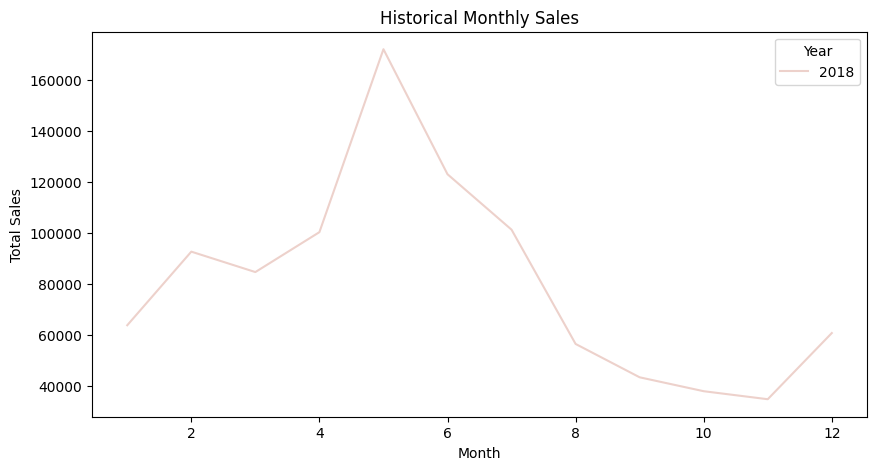

In [37]:
# Compute the total monthly sales
MonthlySales = df.groupby(["Year", "Month"])["Quantity"].sum().reset_index()

# Plot the historical monthly sales with year hue
plt.figure(figsize=(10, 5))
sns.lineplot(x="Month", y="Quantity", hue ="Year", data=MonthlySales)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Historical Monthly Sales")
plt.legend(title="Year")
plt.show()

# Train Test Split

In [44]:
from sklearn.model_selection import train_test_split

# Dropping as no needed
X = df.drop(["InvoiceDate"],axis=1)

# Target Variable, predict sales
y = df.TotalPrice
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, shuffle=False)
print(X_train)
X_test.info()

        InvoiceNo  Stock Code  Description  Quantity   Price  Customer  \
0      2013001184        4466          548       2.0   747.0         1   
1      2012000414        4263         2601       1.0   733.0        41   
2      2012000414        4271         1429      15.0   335.0        41   
3      2012000414        4272         3659       5.0  2232.0        41   
4      2011002855        4267         4464       1.0  9850.0        41   
...           ...         ...          ...       ...     ...       ...   
25272  2011002753        2703          189       1.0   225.0        61   
25273  2011002753         585          621       1.0   123.0        61   
25274  2011002753         586          611       1.0   126.0        61   
25275  2011002753         587          612       2.0   282.0        61   
25276  2011002753         637          635     154.0   387.0        61   

       Region  Date  InvoiceTime  TotalPrice  Transaction Type  Year  Quarter  \
0           7     1           

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# ML Algorithm (Inventory Forecasting)



In [45]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



InvoiceNo           0
Stock Code          0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer            0
Region              0
Date                0
InvoiceTime         0
TotalPrice          0
Transaction Type    0
Year                0
Quarter             0
Month               0
Week                0
IsWeekend           0
dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



LinearRegression: RMSE=2.474469620641587e-10, R^2=1.0


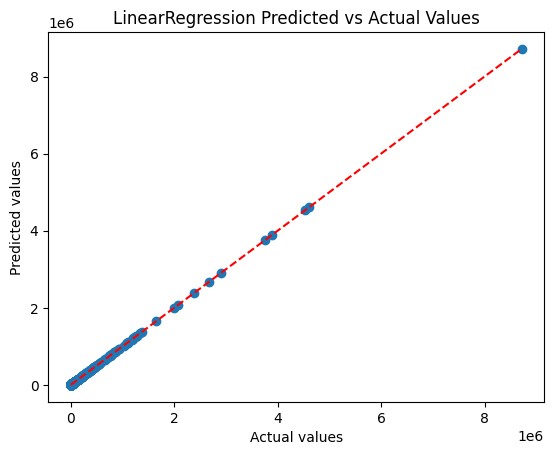

DecisionTreeRegressor: RMSE=52977.15540147317, R^2=0.9122794216284343


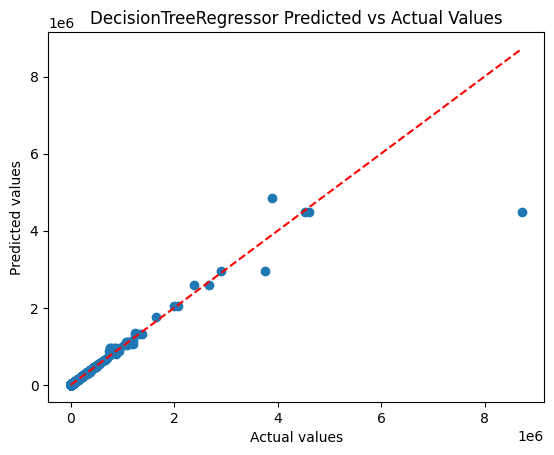

XGBRegressor: RMSE=164636.02475068468, R^2=0.1528233865742049


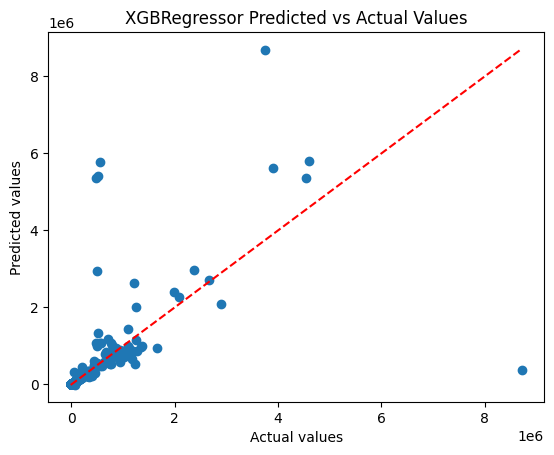

In [46]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Trained and evaluated different regression models
models = [LinearRegression(), DecisionTreeRegressor(), XGBRegressor()]

# For loop to print over each model
for model in models:
    # Train
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    # Check accuracy RMSE and R^2 scores
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    print(f"{type(model).__name__}: RMSE={rmse}, R^2={r2}")

    # Calculate the forecasted values
    if isinstance(model, LinearRegression):
        forecast = model.predict(X_test)

    # Plot predicted vs actual valuess
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    # Title wiht model name
    plt.title(f"{type(model).__name__} Predicted vs Actual Values")

    # Add a line diagonally to aid visulisation
    min_value = min(y_test.min(), y_pred.min())
    max_value = max(y_test.max(), y_pred.max())
    plt.plot([min_value, max_value], [min_value, max_value], "r--")
    plt.show()

In [47]:
# library needed
from plotly.subplots import make_subplots

# Function to show graph
def ShowMe(date, true, preds):
    # Plots
    fig = make_subplots(rows=1, cols=1)

    # Adding the true values to the graph
    fig.add_trace(go.Scatter(x = date, y = true.iloc[:, 0], mode = "lines", marker = dict(color = "#783242"), name = "True"))
    # Addes forcasted values to the graph
    fig.add_trace(go.Scatter(x = date, y = preds.iloc[:, 0], mode="lines", name = "Preds"))

    # Tidying up the graph
    fig.update_layout(
        xaxis = dict(title = "Date"),
        yaxis = dict(title = "TotalPrice"),
        title = "Forecasted Values vs True Values"
    )

    fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [51]:
import plotly.graph_objects as go

# If else codnition for graph with forcasted values ontop of actual
if isinstance(model, LinearRegression):
    forecast = model.predict(X_test.drop("forecast", axis=1))
else:
    forecast = model.predict(X_test)

# Created a new DataFrame for the forecasted values
ForecastDF = pd.DataFrame({"Date": X_test["Date"], "forecast": forecast})

# Combine the forecasted values with the historical data
CombinedDF = pd.concat([df, ForecastDF], ignore_index=True)

# Split the combined DataFrame into true and predicted values based on the splitter index
splitter = round(len(df) * 0.75)
true = CombinedDF.loc[splitter:, ["Date", "TotalPrice"]].groupby("Date").mean()
preds = CombinedDF.loc[splitter:, ["Date", "forecast"]].groupby("Date").mean()

# Plot the true and predicted values
ShowMe(true.index, true, preds)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [52]:
PreDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27990 entries, 0 to 32337
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   InvoiceNo         27990 non-null  int64         
 1   Stock Code        27990 non-null  object        
 2   Description       27990 non-null  object        
 3   Quantity          27990 non-null  float64       
 4   InvoiceDate       27990 non-null  datetime64[ns]
 5   Price             27990 non-null  float64       
 6   Customer          27990 non-null  object        
 7   Region            27990 non-null  object        
 8   Date              27990 non-null  object        
 9   InvoiceTime       27990 non-null  object        
 10  TotalPrice        27990 non-null  float64       
 11  Transaction Type  27990 non-null  object        
 12  Year              27990 non-null  int32         
 13  Quarter           27990 non-null  int32         
 14  Month             27990 non

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

